In [3]:
%matplotlib inline
import os
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import plot_model

Using TensorFlow backend.


In [4]:
#read train data
file_path='/Users/pzhe/Documents/2017_Fall/Machine Learning/1025/image/train';
os.chdir(file_path)
files = os.listdir(file_path)
h = 32;
w = 32;
x_train = np.zeros([19,1024])
for i in range(len(files)):
    img_x = cv2.imread(files[i], 0)
    img_x = img_x.astype('float32')/255
    x_train[i,:] = np.reshape(img_x,w*h,1)
y_train = np.array(range(0,19))
y_train = keras.utils.to_categorical(y_train, 19)

#read validation data
file_path='/Users/pzhe/Documents/2017_Fall/Machine Learning/1025/image/validation';
os.chdir(file_path)
files = os.listdir(file_path)
x_validation = np.zeros([19,1024])
for i in range(len(files)):
    img_x = cv2.imread(files[i], 0)
    img_x = img_x.astype('float32')/255
    x_validation[i,:] = np.reshape(img_x,w*h,1)
y_validation = np.array(range(0,19))
y_validation = keras.utils.to_categorical(y_validation, 19)

#read test data
file_path='/Users/pzhe/Documents/2017_Fall/Machine Learning/1025/image/test';
os.chdir(file_path)
files = os.listdir(file_path)
x_test = np.zeros([2,1024])
for i in range(len(files)):
    img_x = cv2.imread(files[i], 0)
    img_x = img_x.astype('float32')/255
    x_test[i,:] = np.reshape(img_x,w*h,1)
y_test = np.array([17,17])
y_test = keras.utils.to_categorical(y_test, 19)

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 19)                9747      
Total params: 797,203
Trainable params: 797,203
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=200,
                    verbose=1,
                    validation_data=(x_validation, y_validation))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 19 samples, validate on 19 samples
Epoch 1/200
19/19 [==============================] - 0s - loss: 4.6822 - acc: 0.0000e+00 - val_loss: 2.9762 - val_acc: 0.1053
Epoch 2/200
19/19 [==============================] - 0s - loss: 3.6222 - acc: 0.0000e+00 - val_loss: 2.9523 - val_acc: 0.1053
Epoch 3/200
19/19 [==============================] - 0s - loss: 3.2714 - acc: 0.0000e+00 - val_loss: 2.9112 - val_acc: 0.0526
Epoch 4/200
19/19 [==============================] - 0s - loss: 3.1677 - acc: 0.0000e+00 - val_loss: 2.9082 - val_acc: 0.1053
Epoch 5/200
19/19 [==============================] - 0s - loss: 3.0668 - acc: 0.0526 - val_loss: 2.8669 - val_acc: 0.1579
Epoch 6/200
19/19 [==============================] - 0s - loss: 3.0782 - acc: 0.0000e+00 - val_loss: 2.8335 - val_acc: 0.1053
Epoch 7/200
19/19 [==============================] - 0s - loss: 2.9995 - acc: 0.0000e+00 - val_loss: 2.7673 - val_acc: 0.1053
Epoch 8/200
19/19 [==============================] - 0s - loss: 3.0067 - acc: 

19/19 [==============================] - 0s - loss: 0.7099 - acc: 0.7368 - val_loss: 0.2253 - val_acc: 0.9474
Epoch 68/200
19/19 [==============================] - 0s - loss: 0.2213 - acc: 1.0000 - val_loss: 0.2951 - val_acc: 0.8421
Epoch 69/200
19/19 [==============================] - 0s - loss: 0.2647 - acc: 0.8947 - val_loss: 0.2940 - val_acc: 0.8947
Epoch 70/200
19/19 [==============================] - 0s - loss: 0.3954 - acc: 0.9474 - val_loss: 0.6383 - val_acc: 0.7895
Epoch 71/200
19/19 [==============================] - 0s - loss: 0.6646 - acc: 0.6842 - val_loss: 0.3418 - val_acc: 0.8947
Epoch 72/200
19/19 [==============================] - 0s - loss: 0.2662 - acc: 0.8947 - val_loss: 0.2324 - val_acc: 0.9474
Epoch 73/200
19/19 [==============================] - 0s - loss: 0.2063 - acc: 0.9474 - val_loss: 0.2281 - val_acc: 0.8947
Epoch 74/200
19/19 [==============================] - 0s - loss: 0.3686 - acc: 0.8421 - val_loss: 0.1928 - val_acc: 1.0000
Epoch 75/200
19/19 [=========

19/19 [==============================] - 0s - loss: 0.0130 - acc: 1.0000 - val_loss: 0.1153 - val_acc: 0.9474
Epoch 134/200
19/19 [==============================] - 0s - loss: 0.0246 - acc: 1.0000 - val_loss: 0.0737 - val_acc: 1.0000
Epoch 135/200
19/19 [==============================] - 0s - loss: 0.3545 - acc: 0.9474 - val_loss: 0.1101 - val_acc: 0.9474
Epoch 136/200
19/19 [==============================] - 0s - loss: 0.2928 - acc: 0.9474 - val_loss: 0.1353 - val_acc: 1.0000
Epoch 137/200
19/19 [==============================] - 0s - loss: 0.0567 - acc: 0.9474 - val_loss: 0.1967 - val_acc: 0.8947
Epoch 138/200
19/19 [==============================] - 0s - loss: 0.0394 - acc: 1.0000 - val_loss: 0.0916 - val_acc: 0.9474
Epoch 139/200
19/19 [==============================] - 0s - loss: 0.1486 - acc: 0.9474 - val_loss: 0.5659 - val_acc: 0.8947
Epoch 140/200
19/19 [==============================] - 0s - loss: 0.1043 - acc: 0.9474 - val_loss: 0.0572 - val_acc: 1.0000
Epoch 141/200
19/19 [=

19/19 [==============================] - 0s - loss: 0.0259 - acc: 1.0000 - val_loss: 0.1491 - val_acc: 0.9474
Epoch 199/200
19/19 [==============================] - 0s - loss: 0.0611 - acc: 1.0000 - val_loss: 0.1004 - val_acc: 0.9474
Epoch 200/200
19/19 [==============================] - 0s - loss: 0.1073 - acc: 0.9474 - val_loss: 0.1468 - val_acc: 0.8947
('Test loss:', 0.053058590739965439)
('Test accuracy:', 1.0)


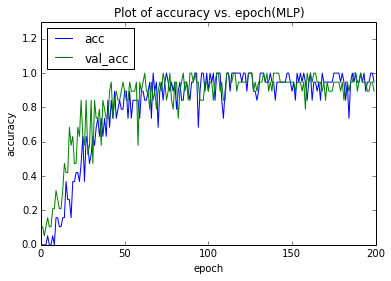

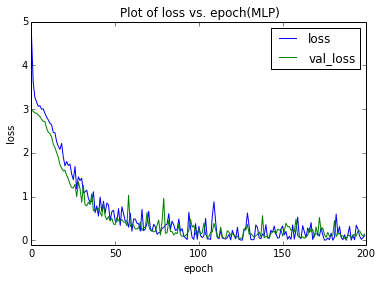

In [7]:
# plot the result
plt.plot(history.epoch,history.history['acc'],label="acc")
plt.plot(history.epoch,history.history['val_acc'],label="val_acc")
plt.legend(loc='upper left')
plt.ylim(0.0, 1.3)
plt.title('Plot of accuracy vs. epoch(MLP)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
plt.plot(history.epoch,history.history['loss'],label="loss")
plt.plot(history.epoch,history.history['val_loss'],label="val_loss")
plt.legend(loc='upper right')
plt.ylim(-0.1,5.0)
plt.title('Plot of loss vs. epoch(MLP)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()